In [212]:
# installs
!python3.11 -m pip install numpy
!python3.11 -m pip install scipy
!python3.11 -m pip install matplotlib

In [213]:
import numpy as np

In [214]:
loaded = np.load("./endeavour.npz")
task1 = loaded["task1"]
task2 = loaded["task2"]
task3 = loaded["task3"]
task4 = loaded["task4"]
task6a = loaded["task6a"]
task6b = loaded["task6b"]
task7a = loaded["task7a"]
task7b = loaded["task7b"]

In [215]:
import matplotlib.pyplot as plt

# Task 1


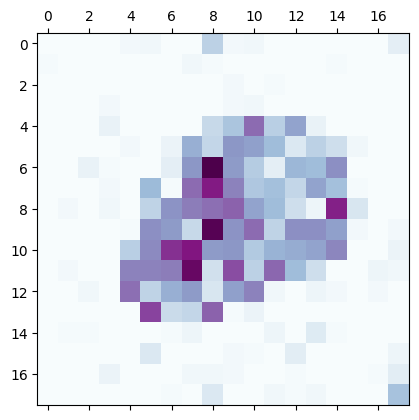

In [216]:
# reference pattern
plt.matshow(task1[0], cmap="BuPu")

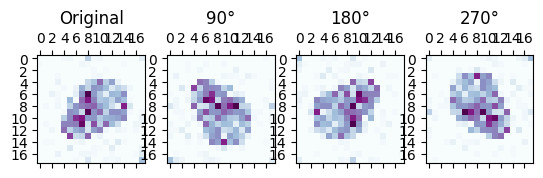

In [217]:
task_1_fig_1, axis = plt.subplots(1, 4)

axis[0].matshow(task1[0], cmap="BuPu")
axis[0].set_title("Original")
axis[1].matshow(np.rot90(task1[0], -1), cmap="BuPu")
axis[1].set_title("90°")
axis[2].matshow(np.rot90(task1[0], -2), cmap="BuPu")
axis[2].set_title("180°")
axis[3].matshow(np.rot90(task1[0], -3), cmap="BuPu")
axis[3].set_title("270°")

plt.show()

In [218]:
task_1_original = task1[0]
task_1_90 = np.rot90(task1[0], -1)
task_1_180 = np.rot90(task1[0], -2)
task_1_270 = np.rot90(task1[0], -3)

task_1_counts = [0, 0, 0, 0]

for i in task1:
    if np.array_equal(i, task_1_90):
        task_1_counts[1] += 1
    elif np.array_equal(i, task_1_180):
        task_1_counts[2] += 1
    elif np.array_equal(i, task_1_270):
        task_1_counts[3] += 1
    else:
        task_1_counts[0] += 1

task_1_counts

[6, 10, 6, 3]

# Task 2


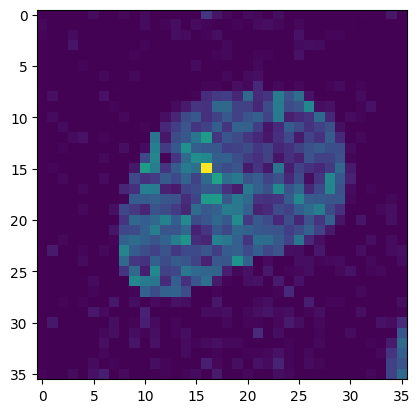

In [ ]:
task_2_original_img = np.reshape(task2[0], (36, 36))
plt.imshow(task_2_original_img, cmap="BuPu")

In [220]:
def reshape_img(img):
    return np.reshape(img, (36, 36))

In [221]:
task_2_original = task2[0]
task_2_90 = np.rot90(reshape_img(task2[0]), -1).flatten()
task_2_180 = np.rot90(reshape_img(task2[0]), -2).flatten()
task_2_270 = np.rot90(reshape_img(task2[0]), -3).flatten()

task_2_counts = [0, 0, 0, 0]

for i in task2:
    if np.array_equal(i, task_2_90):
        task_2_counts[1] += 1
    elif np.array_equal(i, task_2_180):
        task_2_counts[2] += 1
    elif np.array_equal(i, task_2_270):
        task_2_counts[3] += 1
    else:
        task_2_counts[0] += 1

task_2_counts

[22, 32, 21, 25]

# Task 3


In [222]:
np.shape(task3[0])  # = 33 ** 2

(1089,)

In [223]:
task_3_original_image = np.reshape(task3[0], (33, 33))

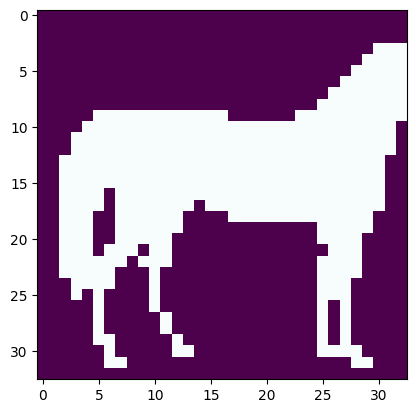

In [224]:
plt.imshow(task_3_original_image, cmap="BuPu")

In [225]:
# This problem can probably be solved by repeating what we did earlier - even if the hint says to use KMeans

task_3_original = task3[0]
task_3_90 = np.rot90(task_3_original_image, -1).flatten()
task_3_180 = np.rot90(task_3_original_image, -2).flatten()
task_3_270 = np.rot90(task_3_original_image, -3).flatten()

In [226]:
task_3_counts = [0, 0, 0, 0]
task_3_sorting = [[], [], [], []]

for i in task3:
    if np.array_equal(i, task_3_90):
        task_3_counts[1] += 1
        task_3_sorting[1].append(i)
    elif np.array_equal(i, task_3_180):
        task_3_counts[2] += 1
        task_3_sorting[2].append(i)
    elif np.array_equal(i, task_3_270):
        task_3_counts[3] += 1
        task_3_sorting[3].append(i)
    else:
        task_3_counts[0] += 1
        task_3_sorting[0].append(i)

task_3_counts

[254, 236, 250, 260]

In [227]:
task_3_sorted = np.array(
    task_3_sorting[0] + task_3_sorting[1] + task_3_sorting[2] + task_3_sorting[3]
)

task_3_sorted

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint16)

Text(0.5, 1.0, 'Sorted')

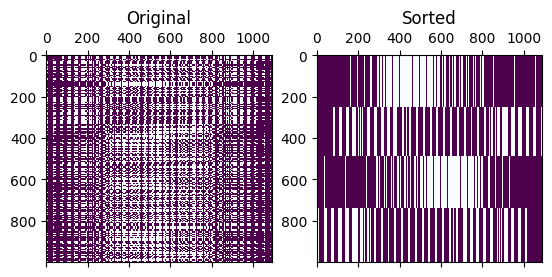

In [228]:
# Plot the design matrices

task_3_subplot, task_3_axes = plt.subplots(1, 2)

task_3_axes[0].matshow(task3, cmap="BuPu")
task_3_axes[0].set_title("Original")
task_3_axes[1].matshow(task_3_sorted, cmap="BuPu")
task_3_axes[1].set_title("Sorted")

# Task 4


In [229]:
task_4_row_sums = np.empty(1)

for i in task4:
    task_4_row_sums = np.append(task_4_row_sums, np.sum(i))

task_4_row_sums = task_4_row_sums[1:]

np.average(task_4_row_sums)

1251.047

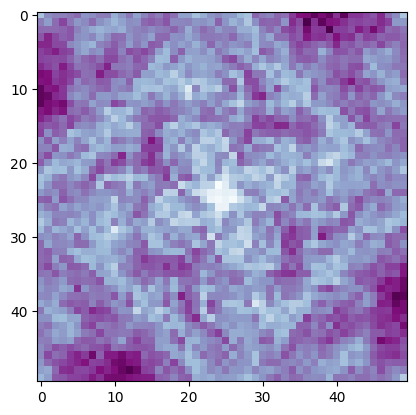

In [230]:
task_4_average_assuming = np.sum(task4, axis=0) / task4.shape[0]

plt.imshow(np.reshape(task_4_average_assuming, (50, 50)), cmap="BuPu")

Setting up K-Means


In [231]:
from sklearn.cluster import KMeans

# 4 directions, so 4 expected clusters
kmeans = KMeans(n_clusters=4, n_init=20, init="k-means++")
output_labels = kmeans.fit_predict(task4)

In [232]:
task_4_sorting = [[], [], [], []]

for i in range(task4.shape[0]):
    task_4_sorting[output_labels[i]].append(task4[i])

In [233]:
task_4_orientations = []
for i in range(4):
    task_4_orientations.append(np.array(task_4_sorting[i]))

task_4_orientations[3].shape

(236, 2500)

In [234]:
def average_img(imgs):
    return np.sum(imgs, axis=0) / imgs.shape[0]

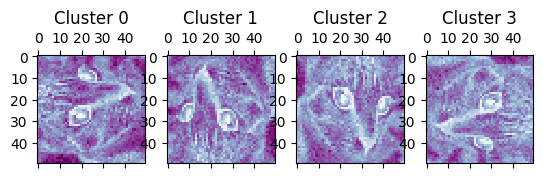

In [235]:
task_4_subplot, task_4_axes = plt.subplots(1, 4)

for i in range(4):
    task_4_axes[i].matshow(
        np.reshape(average_img(task_4_orientations[i]), (50, 50)), cmap="BuPu"
    )
    task_4_axes[i].set_title(f"Cluster {i}")

# Task 5

No code.


# Task 6


In [236]:
task6a.shape, task6b.shape

((1556153,), (1556153,))

In [237]:
task6a, task6b

(array([    0,     0,     0, ..., 65534, 65534, 65534], dtype=uint16),
 array([ 13,  61,  66, ..., 551, 582, 587], dtype=uint16))

In [238]:
# Count of task 6a (or 6b) is the number of ones.
task_6_avg_row_sum = task6a.shape[0] / 65535

task_6_avg_row_sum

23.745372701609828

In [239]:
task_6_matrix = np.empty((65535, 625))

for i in range(task6a.shape[0]):
    task_6_matrix[task6a[i]][task6b[i]] = 1

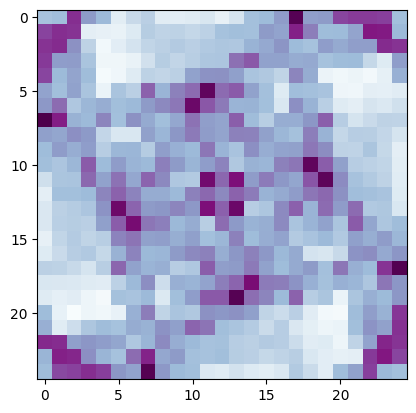

In [240]:
plt.imshow(np.reshape(average_img(task_6_matrix), (25, 25)), cmap="BuPu")

In [241]:
task_6_output_labels = kmeans.fit_predict(task_6_matrix)

In [242]:
task_6_sorting = [[], [], [], []]

for i in range(task_6_matrix.shape[0]):
    task_6_sorting[task_6_output_labels[i]].append(task_6_matrix[i])

task_6_orientations = []
for i in range(4):
    task_6_orientations.append(np.array(task_6_sorting[i]))

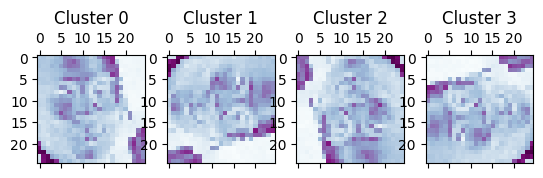

In [243]:
task_6_subplot, task_6_axes = plt.subplots(1, 4)

for i in range(4):
    task_6_axes[i].matshow(
        np.reshape(average_img(task_6_orientations[i]), (25, 25)), cmap="BuPu"
    )
    task_6_axes[i].set_title(f"Cluster {i}")

# Task 7


In [244]:
task_7_matrix = np.empty((100_000, 625))

for i in range(task7a.shape[0]):
    task_7_matrix[task7a[i]][task7b[i]] = 1

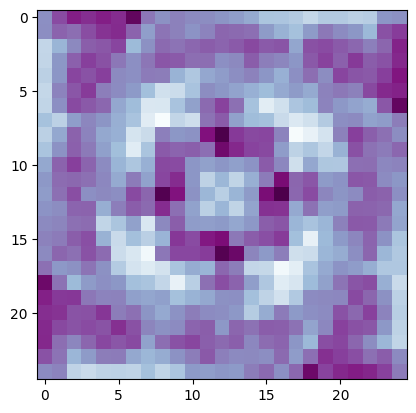

In [245]:
plt.imshow(np.reshape(average_img(task_7_matrix), (25, 25)), cmap="BuPu")